In [18]:
# **04_hypothesis_2.ipynb**

### Objectives

* Testing hypothesis 2

  - investigate relationship between vaccination and health condition

**Null hypothesis: Vaccination has no effect on the likelihood of an animal being adopted**

**Alternative hypothesis: Vaccinated animals are more likely to be adopted**



In [19]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [20]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/data_clean.csv')
df.head()

,PetType,Breed,AgeMonths,Colour,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10.916667
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6.083333
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11.333333
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8.083333
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10.250000


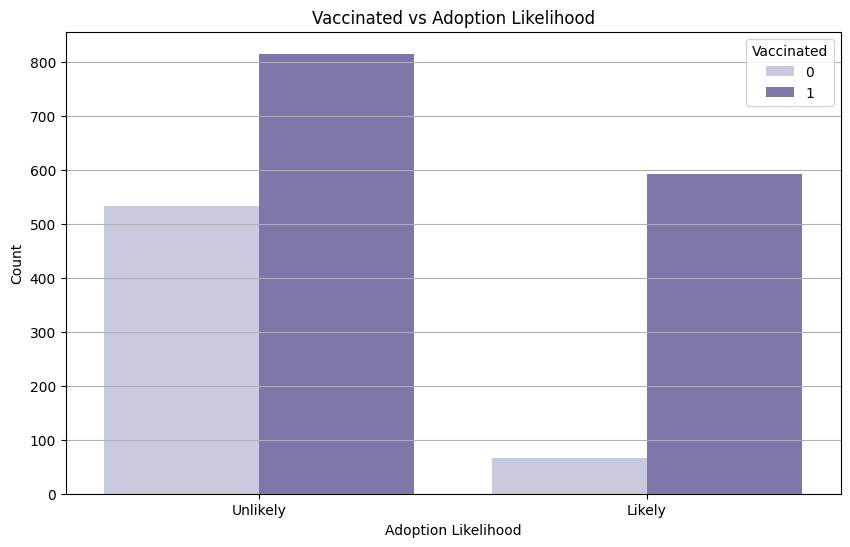

In [21]:
# count plot of vaccination vs adoption likelihood
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='AdoptionLikelihood',
    hue='Vaccinated',
    palette='Purples'
)

plt.title('Vaccinated vs Adoption Likelihood')
plt.xticks([0, 1], ['Unlikely', 'Likely'])
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()


From looking at the initial countplot it would appear that it is more likely for an animal to get adopted if it is vaccinated.

### *Confirm with statistical testing.*

#### Firstly we need to see if the data is normally distributed.

In [22]:
# check for normality using pingouin
df_check = pg.normality(data=df, alpha=0.05)
df_check

,W,pval,normal
AgeMonths,0.951722,3.329216e-25,False
WeightKg,0.955792,3.338498e-24,False
Vaccinated,0.574971,8.332415e-57,False
HealthCondition,0.485692,3.310651e-60,False
TimeInShelterDays,0.953267,7.847404e-25,False
AdoptionFee,0.955278,2.473835e-24,False
PreviousOwner,0.576880,9.995818e-57,False
AdoptionLikelihood,0.592282,4.455643e-56,False
AgeInYears,0.951722,3.329216e-25,False


The data is not normally distributed, the data is independent (one row per pet and no time series data), and both variables are categorical, therefore we will use a Chi-Squared Test.